# API tutorial

> Turorial on how to interact with the dcl_stats_n_plots API

## Getting started

dcl_stats_n_plots is available from PyPi, so just run:

> `pip install dcl-stats-n-plots`

for installation. If you are new to python and/or the jupyter interface and want a more detailed guide, please have a look at our [installation guide](https://dsegebarth.github.io/dcl_stats_n_plots/gui_tutorial.html#Getting-started). For this tutorial, we will use some demo files with dummy data, which are available [here](https://github.com/DSegebarth/dcl_stats_n_plots/tree/master/test_data).

In the following, you will find some examples for each type of implemented statistical analysis, including the corresponding plotting and annotation functions. Currently, the implemented analyses are:

1. Comparison of two or more independent samples
2. Comparison of one group to a reference value
3. Mixed-Model ANOVA (comparison of two or more groups with repeated measures)

You will find the most detailed description of how to use our API in the [first section](https://dsegebarth.github.io/dcl_stats_n_plots/api_tutorial.html#Comparison-of-two-or-more-independent-samples). Thus, you might want to go through this section to get the most in-depth intro to our API, even though you want to perform a different kind of analysis in the end. 

> Note: This package relies heavily on the correct design of the input data. Therefore, please take some time before using one of the implemented functionalities and make sure you got the input data organized in the right way. In general, this packages requires the input data to be organized in the so-called "long format" with a fixed column order. Please check out the "Expected input data format" section for the respective test for detailed information.

## Comparison of two or more independent samples

### Representative experiment

The comparison of two or more independent samples is probably one of the most frequently performed analyses in the lab. You can use this type of analysis if you:

- have multiple experimental subjects (>3) 
- that belong to at least two different groups
- and the given experiment is perfomed only once with each experimental subject (no repeated measurements)

For instance, if you recorded a single open field session of each mouse in a experimental cohort of 36 mice, which represent three different genotypes (12 homozygous transgenic mice \[tg/tg\], 12 heterozygous transgenic mice \[tg/+\], and 12 wildtype mice \[+/+\]). After you analyzed the videos, you now want to test for significant differences in the time the mice spent in the center of the open field - based on their genotype.

> Note: Equal samples sizes per group is ideal, yet no prerequisite for this analysis.

### Expected input data format

For this analysis, you only have to provide two columns. The first one that contains the actual data values, and the second column that specifies to which group the respective data value belongs. In Microsoft Excel, this might look like the following:

![independent_samples_input_schema.png](https://raw.githubusercontent.com/DSegebarth/dcl_stats_n_plots/master/media/independent_samples_input_schema.png)

Where the first two data values belong to the group called "group_a", the third and fourth to a second group called "group_b", and the sixth and seventh value belong to a third group called "group_c". You probably got the idea ;-)

You are entirely free to choose any column names (for instance "time spent in center \[s\]" instead of "data", or "genotype" instead of "group_id") and also to provide your favorite group names (e.g. "+/+" instead of "group_a" and "tg/+" for "group_b"). 

> Note: The column name of your data column will be used as the default y-axis label, but you will still be able to modify that on demand.

> Note: The order of appearance of the groups in the group column (top to bottom) will be used as the default x-axis order, but you will still be able to modify that on demand.

### Compute the stats

Now that we know how the input data has to be organized, let´s start with the statistical analysis of our dataset, using one of our dummy data test files, which are available [here](https://github.com/DSegebarth/dcl_stats_n_plots/tree/master/test_data). This dataset contains a total of 36 data values from three different groups ('tg/tg', 'tg/+', '+/+' - 12 values per group). For reasons of clarity, only the first 5 rows will be displayed.

In [ ]:
import pandas as pd

file_url = 'https://raw.githubusercontent.com/DSegebarth/dcl_stats_n_plots/master/test_data/independent_samples_3groups.csv'



df = pd.read_csv(file_url)
df.head()

,data,group_id
0,49.777617,tg/tg
1,89.128475,tg/tg
2,30.198986,tg/tg
3,19.939498,tg/tg
4,51.822569,tg/tg


To perform the statistical analysis, all we now have to do is pass this data as Pandas DataFrame to the `independent_samples` function of the stats module.
This will return a dictionary containing the results of the statistical analysis, but also some automatically extracted parameters that will be of use for both plotting and annotation of the data later on. For the exact details of which statistical tests are performed, please head over to the documentation of the `independent_samples` function. In brief: 

1. The prerequisites for parametric testing (normal distribution and equality of variances) are assessed
2. Parametric or non-parametric tests are used accordingly
3. If the dataset contains more than two groups, pairwise comparisons of all possible combinations are performed and the results are corrected for multiple comparisons

The results of the pairwise comparisons can be accessed as follows:

In [ ]:
from dcl_stats_n_plots import stats

results = stats.independent_samples(df)

results['summary']['pairwise_comparisons']

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,group_id,+/+,tg/+,False,False,11.0,two-sided,0.000478,0.000955,holm,-1.853544
1,group_id,+/+,tg/tg,False,False,8.0,two-sided,0.000246,0.000739,holm,-1.780161
2,group_id,tg/+,tg/tg,False,False,51.0,two-sided,0.236584,0.236584,holm,-0.716468


If there were more than two groups present, the results of the group level statistical test can be accessed as:

In [ ]:
results['summary']['group_level_statistic']

,Source,ddof1,H,p-unc
Kruskal,group_id,2,18.355856,0.000103


> Note: Again, for more detailed information about the statistical tests, as well as the generated output, please have a look at the documentation of the `independent_samples` function. Here you will also find links to the corresponding functions of the python package "pingouin", which is used for statistical testing.

### Plot the data and annotate the stats:

With the `results` dictionary and our dataset as Pandas DataFrame, we have everything we need to plot the data and annotate the stats in one go.

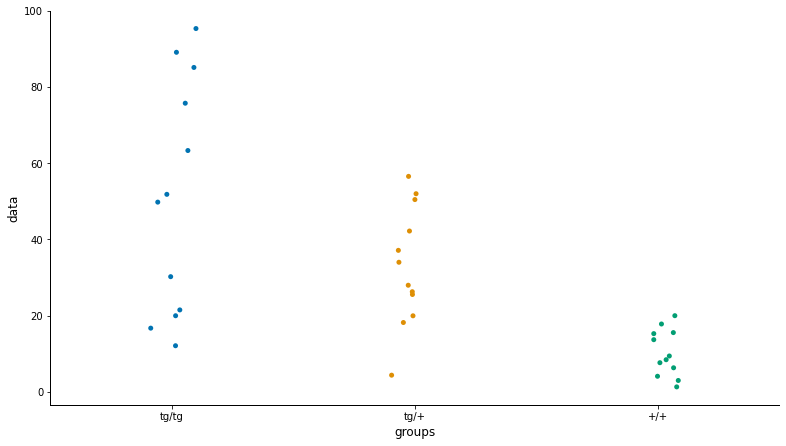

In [ ]:
from dcl_stats_n_plots import plots

plots.plot_independent_samples(df, plot_type = 'stripplot')

For all types of statistical analyses that are implemented in dcl_stats_n_plots, we also provide several options of how to visualize your data. In order to change the type of plot, simply choose from the range of currently supported plots (see `plot_independent_samples`) and change the string you pass to the function accordingly:

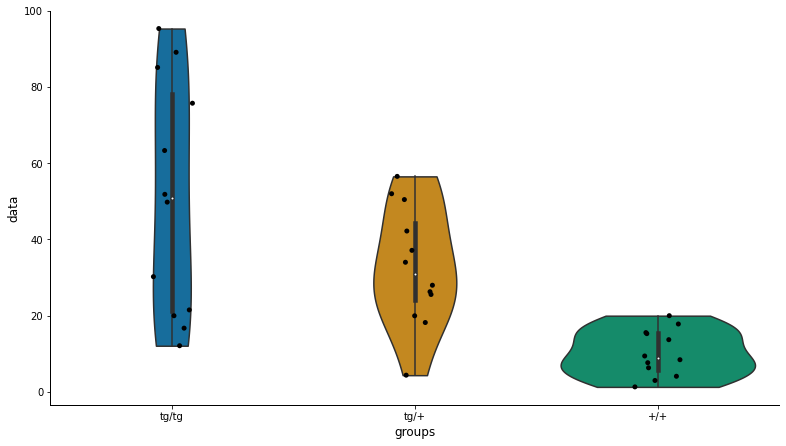

In [ ]:
plots.plot_independent_samples(df, plot_type = 'violinplot with stripplot overlay')

> Warning: The annotation of the statistical results via the API is not yet implemented. This is one of the next features that will be added within one of the following patch releases - if not *the* next.

### Customize the plot

dcl_stats_n_plots provides you with a bunch of customization options. You can find a comprehensive list [here](https://dsegebarth.github.io/dcl_stats_n_plots/plots.html#Customizable-features). Probably the easiest way to explore them all is by using our GUI, where you can play arround with all parameters and interactively change them back and forth until you found the perfect settings for your plot. Since the customization parameters work in the same manner for all types of analyses and plots, feel free to also have a look at the customization examples that are provided for the other types of analyses in this tutorial.

To customize an individual feature, you simply have to pass it when calling the plotting function. For instance, to change the marker size (i.e. the size of the individual data points):

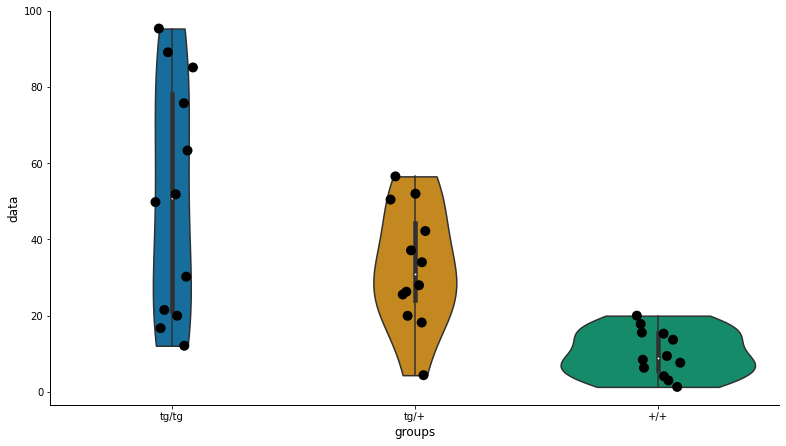

In [ ]:
plots.plot_independent_samples(df, plot_type = 'violinplot with stripplot overlay', marker_size=10)

> Note: As long as you don´t pass information regarding a customizable feature along when calling the plotting functions, the default values will be used. You can find a list of all default values [here](https://dsegebarth.github.io/dcl_stats_n_plots/plots.html#Customizable-features).

Whenever you would like to customize multiple features, we recommend passing a dictionary with all the features you would like to change as key-value-pairs. For instance, you can specify the exact label of the x- and y-axis, change their fontsize, increase the marker size of the stripplot overlay, use a different color palette for the violin plots, and finally adjust the figure size, like this:

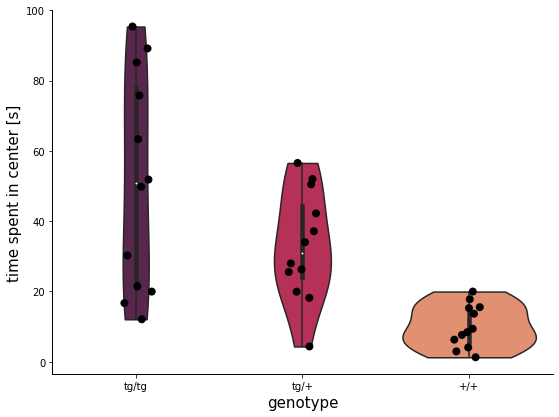

In [ ]:
# Specify the parameters you would like to customize:
params = {'yaxis_label_text': 'time spent in center [s]',
          'yaxis_label_fontsize': 15,
          'xaxis_label_text': 'genotype',
          'xaxis_label_fontsize': 15,
          'marker_size': 8,
          'color_palette': 'rocket',
          'fig_width': 20,
          'fig_height': 15}
          
# Pass the dictionary as 'params' when calling the plotting function
plots.plot_independent_samples(df, plot_type = 'violinplot with stripplot overlay', **params)

## Comparison of a single group to a fixed value

### Representative experiment

> Note: will be added soon.

### Expected input data format

For this analysis, you have to provide three columns. The first column must contain the data, the second column provides the corresponding group_id (see note below the image), and the third column provides the fixed value against which the group shall be compared.

In Microsoft Excel, this might look like the following:

![one_sample_input_schema.png](https://raw.githubusercontent.com/DSegebarth/dcl_stats_n_plots/master/media/one_sample_input_schema.png)

> Note: Of course, the second column ('group column') will only contain one group_id, since this is a _one sample_ analysis. However, keeping the expected input data structure consistent across functions (data, group, ..) is supposed to make the use of dcl_stats_n_plots a little easier for the user. On top, it allows the user to provide the x-axis-label (= group column header) and the corresponding x-axis-tick-label (= the group_id that is provided in the group column).

### Compute the stats

In order to perform the statistical analysis, simply pass the data in a correctly structured pandas DataFrame to our `one_sample` function of the stats module. Please also check out the documentation there for more detailed information about what statistical tests are run.

In [ ]:
import pandas as pd

file_url = 'https://raw.githubusercontent.com/DSegebarth/dcl_stats_n_plots/master/test_data/one_sample_significant.csv'

df = pd.read_csv(file_url)
df.head()

,data,group_id,fixed_value
0,20.803300,group_a,50.0
1,38.016262,group_a,NaN
2,49.724380,group_a,NaN
3,35.418847,group_a,NaN
4,36.050618,group_a,NaN


In [ ]:
from dcl_stats_n_plots import stats

results = stats.one_sample(df)

results['summary']['pairwise_comparisons']

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.692558,9,two-sided,0.024693,"[24.34, 47.77]",0.851462,3.032,0.669742


### Plot the data and annotate the stats:

Using the `results` dictionary, we now have the option plot our data and annotate the results of the statistical analysis in one go.

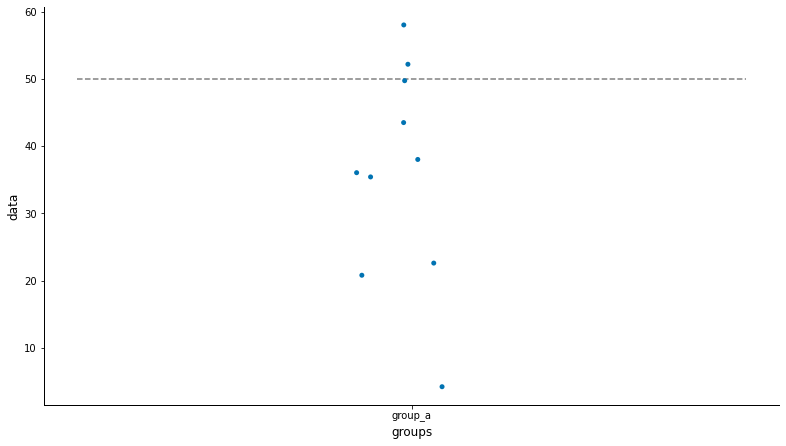

In [ ]:
from dcl_stats_n_plots import plots

plots.plot_one_sample(df, plot_type = 'stripplot')

> Warning: The annotation of the statistical results via the API is not yet implemented. This is one of the next features that will be added within one of the following patch releases - if not *the* next.

### Customize the plot

You also have the chance to customize several features of the generated plot, simply by specifying the respective features in a dictionary and passing it along when you call the plotting function. Please find a comprehensive list of all customizable features [here](https://dsegebarth.github.io/dcl_stats_n_plots/plots.html#Customizable-features).

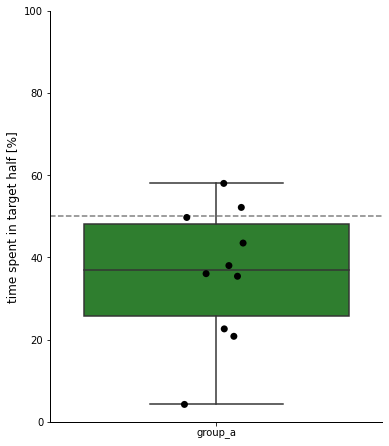

In [ ]:
params = {'color_palette': {'group_a': 'forestgreen'},
          'marker_size': 7,
          'fig_width': 14,
          'yaxis_scaling_mode': 'manual',
          'yaxis_lower_lim_value': 0,
          'yaxis_upper_lim_value': 100,
          'yaxis_label_text': 'time spent in target half [%]',
          'xaxis_label_text': ''}

plots.plot_one_sample(df, plot_type = 'boxplot with stripplot overlay', **params)

## Mixed-Model ANOVA

> Warning: This function is currently only implemented in a parametric variant (there is no non-parametric equivalent available via pingouin). This affects only the group level statistics (main effects), while pairwise comparisons are again performed either using parametric or non-parametric tests, depending on the respective data.

### Representative experiment

> Note: will be added soon.

### Expected input data format

Now, for this analysis, things get a little bit more complicated. In total, your input data has to be structured in four columns (also have a look at the image below). First and second column are again, as for the other analyses, the columns that provide the data values (1st) and group assignment (2nd). The third column has to provide unique subject identifiers for each experimental subject. The values of the fourth column reflect the corresponding recording sessions (i.e. an identifier for each part of your experiment, in which one of the repeated measurements took place).

In Microsoft Excel, this might look like the following:

![mma_input_schema.png](https://raw.githubusercontent.com/DSegebarth/dcl_stats_n_plots/master/media/mma_input_schema.png)

### Compute the stats

In order to perform the statistical analysis, simply pass the data in a correctly structured pandas DataFrame to the `mixed_model_ANOVA` function of the stats module. Please also check out the documentation there for more detailed information about what statistical tests are run.

In [ ]:
import pandas as pd

file_url = 'https://raw.githubusercontent.com/DSegebarth/dcl_stats_n_plots/master/test_data/mixed_model_anova_3groups.csv'

df = pd.read_csv(file_url)
df.head()

,data,group_id,subject_id,session_id
0,77.481552,group_a,mouse_0,session_0
1,65.852625,group_a,mouse_1,session_0
2,22.100638,group_a,mouse_2,session_0
3,81.969348,group_a,mouse_3,session_0
4,29.748256,group_a,mouse_4,session_0


Since this function is currently only implemented in a parametric variant, calling the function will prompt you with a warning about this if your data actually violate the pre-requisites for parametric testing.

In [ ]:
from dcl_stats_n_plots import stats

results = stats.mixed_model_ANOVA(df)

Please be aware that the data require non-parametric testing.
        However, this is not implemented yet and a parametric test is computed instead.


To access the group level statistics of the Mixed-Model ANOVA:

In [ ]:
results['summary']['group_level_statistic']

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,group_id,35128.572732,2,33,17564.286366,142.14269,6.047196e-17,NaN,0.895993,NaN,NaN,NaN,NaN
1,session_id,8026.474691,3,99,2675.491564,9.50643,1.412453e-05,0.000075,0.223647,0.747473,False,0.595991,0.003733
2,Interaction,340.513938,6,99,56.752323,0.20165,9.755467e-01,NaN,0.012074,NaN,NaN,NaN,NaN


And to inspect the pairwise comparisons in detail:

In [ ]:
results['summary']['pairwise_comparisons']

,Contrast,session_id,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,session_id,-,session_0,session_1,True,True,1.713945,35.0,two-sided,9.538362e-02,1.907672e-01,holm,0.673,0.362020
1,session_id,-,session_0,session_2,True,True,4.167179,35.0,two-sided,1.919616e-04,9.598079e-04,holm,138.164,0.732097
2,session_id,-,session_0,session_3,True,True,4.843552,35.0,two-sided,2.571215e-05,1.542729e-04,holm,860.812,0.867332
3,session_id,-,session_1,session_2,True,True,2.072002,35.0,two-sided,4.569679e-02,1.370904e-01,holm,1.198,0.319271
4,session_id,-,session_1,session_3,True,True,2.891506,35.0,two-sided,6.548338e-03,2.619335e-02,holm,6.08,0.473527
5,session_id,-,session_2,session_3,True,True,1.454323,35.0,two-sided,1.547666e-01,1.907672e-01,holm,0.469,0.196162
6,group_id,-,group_a,group_b,False,True,7.571227,22.0,two-sided,1.454963e-07,1.454963e-07,holm,6.399e+04,2.984356
7,group_id,-,group_a,group_c,False,True,15.793020,22.0,two-sided,1.734467e-13,5.203400e-13,holm,2.054e+10,6.225147
8,group_id,-,group_b,group_c,False,True,11.376810,22.0,two-sided,1.099303e-10,2.198605e-10,holm,4.819e+07,4.484406
9,session_id * group_id,session_0,group_a,group_b,False,True,2.154283,22.0,two-sided,4.243233e-02,8.486465e-02,holm,1.848,0.849155


> Note: Please note, that even though the data violated the pre-requisites for parametric testing on the group-level, they were again met for all pairwise comparisons and, thus, parametric testing was used in all these cases. 

### Plot the data and annotate the stats:

Using the `results` dictionary, we now have the option plot our data and annotate the results of the statistical analysis in one go. The 'pointplot' option is good to visualize the progression over the course of the recorded sessions:

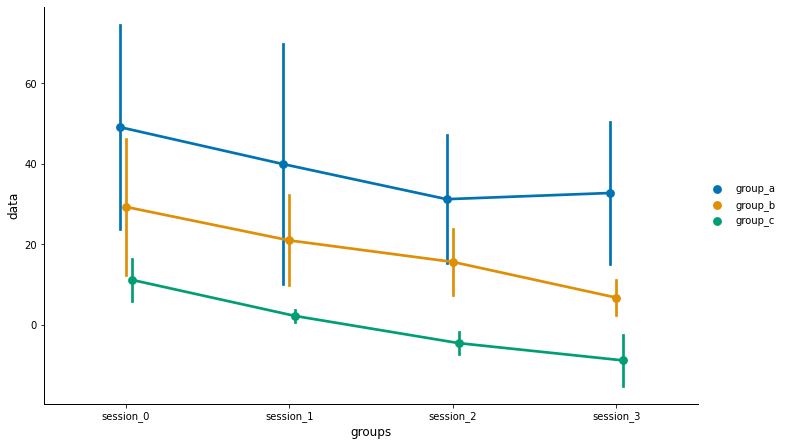

In [ ]:
from dcl_stats_n_plots import plots

plots.plot_mma(df, plot_type = 'pointplot')

However, sometimes there may not be an immediate connection between the individual sessions (which is why the connecting lines should be avoided), or you simply want to show all individual data points, instead of the group mean with an error bar, like for the pointplot. For this, feel free to check out the other plotting options we implemented to visualize your Mixed-Model ANOVA data:

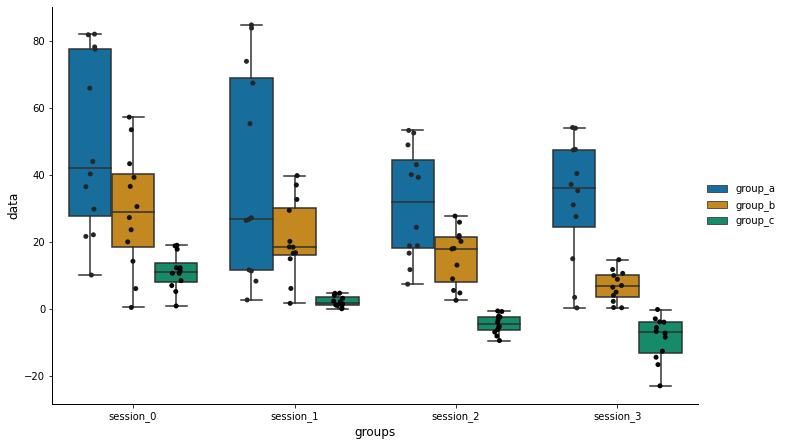

In [ ]:
plots.plot_mma(df, plot_type = 'boxplot with stripplot overlay')

> Warning: The annotation of the statistical results via the API is not yet implemented. This is one of the next features that will be added within one of the following patch releases - if not *the* next.

### Customize the plot

You also have the chance to customize several features of the generated plot, simply by specifying the respective features in a dictionary and passing it along when you call the plotting function. Please find a comprehensive list of all customizable features [here](https://dsegebarth.github.io/dcl_stats_n_plots/plots.html#Customizable-features).

For instance, you can also re-arrange the order of the x-axis labels or of the groups. 

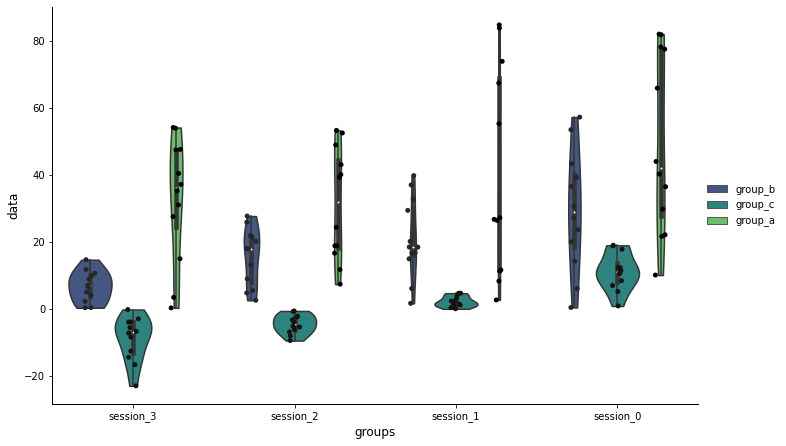

In [ ]:
params = {'l_xlabel_order': ['session_3', 'session_2', 'session_1', 'session_0'],
          'l_hue_order': ['group_b', 'group_c', 'group_a'],
          'color_palette': 'viridis'}

plots.plot_mma(df, plot_type = 'violinplot with stripplot overlay', **params)

> Warning: To be continued...